## การทำนายผลิตภัณฑ์มวลรวมต่อหัวประชากร (Gross Domestic Product : GDP per capita) ของแต่ละประเทศโดยใช้แมชชีนเลิร์นนิง (Machine Learning)




นาย นวภูมิ พานิชย์วิไล

## 1) Data Exploration

In [324]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

อ่านไฟล์ชุดข้อมูล (CSV)

In [326]:
data = pd.read_csv("countries of the world.csv",decimal=',')               
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [328]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


ทำการจัดกลุ่มข้อมูล เพื่อดูจำนวนประเทศทั้งหมดในแต่ละภูมิภาค

In [329]:
region = data.groupby('Region')['Country'].size().sort_values(ascending=False)        
pd.DataFrame(region)                            

,Country
Region,
SUB-SAHARAN AFRICA,51
LATIN AMER. & CARIB,45
ASIA (EX. NEAR EAST),28
WESTERN EUROPE,28
OCEANIA,21
NEAR EAST,16
C.W. OF IND. STATES,12
EASTERN EUROPE,12
NORTHERN AFRICA,6


ดูค่าสถิติต่างๆของข้อมูลที่มีผลกระทบต่อ GDP

In [330]:
regionMean = data.groupby('Region')['GDP ($ per capita)','Phones (per 1000)','Literacy (%)','Birthrate','Deathrate','Infant mortality (per 1000 births)'].aggregate([max,min,np.median,np.mean])
regionMean 

<ipython-input-330-ec8f25bfa02b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regionMean = data.groupby('Region')['GDP ($ per capita)','Phones (per 1000)','Literacy (%)','Birthrate','Deathrate','Infant mortality (per 1000 births)'].aggregate([max,min,np.median,np.mean])


GDP ($ per capita)                    \
                                                   max      min   median   
Region                                                                     
ASIA (EX. NEAR EAST)                           28800.0    500.0   3450.0   
BALTICS                                        12300.0  10200.0  11400.0   
C.W. OF IND. STATES                             8900.0   1000.0   3450.0   
EASTERN EUROPE                                 19000.0   2200.0   9100.0   
LATIN AMER. & CARIB                            35000.0   1600.0   6300.0   
NEAR EAST                                      23200.0    600.0   9250.0   
NORTHERN AFRICA                                 6900.0   4000.0   6000.0   
NORTHERN AMERICA                               37800.0   6900.0  29800.0   
OCEANIA                                        29000.0    800.0   5000.0   
SUB-SAHARAN AFRICA                             11400.0    500.0   1300.0   
WESTERN EUROPE                                 55100.0  17500.0  27200.0   

                                                  Phones (per 1000)         \
                                             mean               max    min   
Region                                                                       
ASIA (EX. NEAR EAST)                  8053.571429             591.0    2.6   
BALTICS                              11300.000000             333.8  223.4   
C.W. OF IND. STATES                   4000.000000             319.1   33.5   
EASTERN EUROPE                        9808.333333             420.4   71.2   
LATIN AMER. & CARIB                   8682.222222             836.3   16.9   
NEAR EAST                            10456.250000             475.3   37.2   
NORTHERN AFRICA                       5460.000000             131.8   40.4   
NORTHERN AMERICA                     26100.000000             898.0  448.9   
OCEANIA                               8247.619048             565.5   10.9   
SUB-SAHARAN AFRICA                    2323.529412             380.9    0.2   
WESTERN EUROPE                       27046.428571            1035.6  399.2   

                                                        Literacy (%)        \
                                     median        mean          max   min   
Region                                                                       
ASIA (EX. NEAR EAST)                  61.50  171.159259         99.0  36.0   
BALTICS                              321.40  292.866667         99.8  99.6   
C.W. OF IND. STATES                  155.35  163.850000         99.7  97.0   
EASTERN EUROPE                       296.05  280.750000         99.9  86.5   
LATIN AMER. & CARIB                  222.85  271.661364         98.8  52.9   
NEAR EAST                            211.00  209.113333         97.6  40.4   
NORTHERN AFRICA                      123.60  100.200000         82.6  51.7   
NORTHERN AMERICA                     683.20  686.740000         99.0  97.0   
OCEANIA                              118.60  189.885714        100.0  50.0   
SUB-SAHARAN AFRICA                     9.70   42.507843         97.0  17.6   
WESTERN EUROPE                       564.50  593.807143        100.0  92.8   

                                     ... Birthrate            Deathrate  \
                                     ...    median       mean       max   
Region                               ...                                  
ASIA (EX. NEAR EAST)                 ...    19.565  21.157857     20.34   
BALTICS                              ...     9.240   9.343333     13.66   
C.W. OF IND. STATES                  ...    15.850  17.855833     14.65   
EASTERN EUROPE                       ...     9.720  10.370909     14.27   
LATIN AMER. & CARIB                  ...    18.020  19.081111     12.17   
NEAR EAST                            ...    21.595  25.031875      8.30   
NORTHERN AFRICA                      ...    21.980  20.814000      5.58   
NORTHERN AMERICA                   

## 2) Data Cleaning and Wrangling

ตรวจสอบค่า Null ในคอลัมน์ทั้งหมด

In [331]:
print('Missing Data:')
data.isnull().sum()              

Missing Data:


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

แทนค่า Null ด้วยค่ามัธยฐาน (Median) ของข้อมูลในแต่ละคอลัมน์

In [332]:
for i in data.columns.values:       
    if data[i].isnull().sum() == 0:
        continue
    else:
        newdata = data.groupby('Region')[i].median()
    for region in data['Region'].unique():
        data[i].loc[ (data[i].isnull()) & (data['Region']==region) ] = newdata[region]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ตรวจสอบค่า Null อีกครั้ง หลังทำการคลีนชุดข้อมูล

In [333]:
print('Missing Data:')
data.isnull().sum()    

Missing Data:


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## 3) Data Visualization

พล็อตกราฟ Boxplot แสดงค่าทางสถิติระหว่างผลิตภัณฑ์มวลรวมต่อหัวประชากร (GDP per capita) กับภูมิภาคทั้งหมด

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

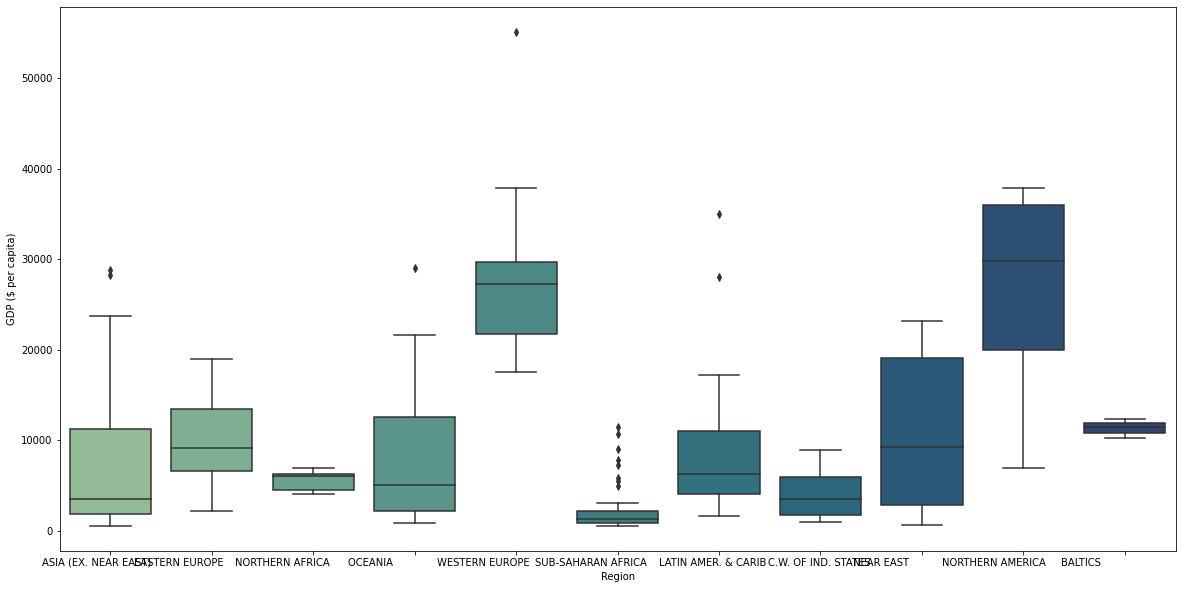

In [334]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Region',y='GDP ($ per capita)',data=data,palette='crest')
plt.xticks(rotation=0)        

พล็อตกราฟแสดง 20 อันดับประเทศที่มีผลิตภัณฑ์มวลรวมต่อหัวประชากร (GDP per capita) สูงที่สุด

Region
WESTERN EUROPE                         12
NORTHERN AMERICA                        3
ASIA (EX. NEAR EAST)                    2
LATIN AMER. & CARIB                     2
OCEANIA                                 1
dtype: int64

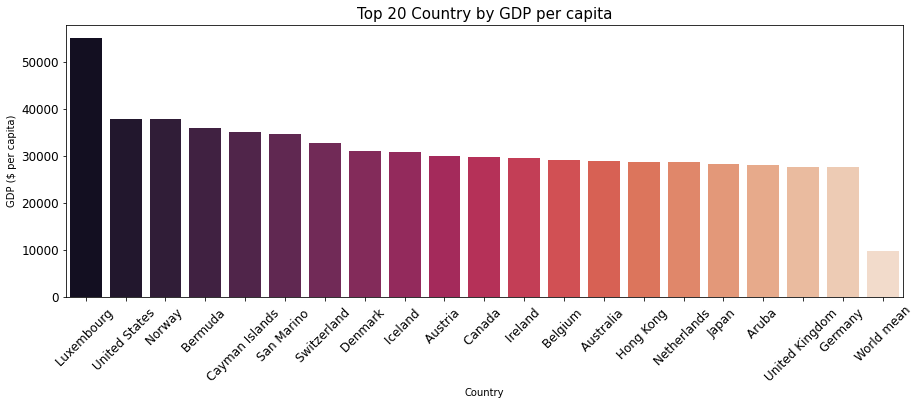

In [335]:
top20 = data.sort_values('GDP ($ per capita)',ascending=False,ignore_index=True).head(20)

mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
top20_and_mean = pd.concat([top20[['Country','GDP ($ per capita)']],mean],ignore_index=True)

plt.figure(figsize=(15,5))
plt.title('Top 20 Country by GDP per capita', fontsize=15)

sns.barplot(x='Country', y='GDP ($ per capita)', data=top20_and_mean, palette='rocket')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

top20.groupby('Region').size().sort_values(ascending=False)

พล็อตกราฟแสดง 20 อันดับประเทศที่มีผลิตภัณฑ์มวลรวมต่อหัวประชากร (GDP per capita) ต่ำที่สุด

Region
SUB-SAHARAN AFRICA                     14
NEAR EAST                               3
ASIA (EX. NEAR EAST)                    2
OCEANIA                                 1
dtype: int64

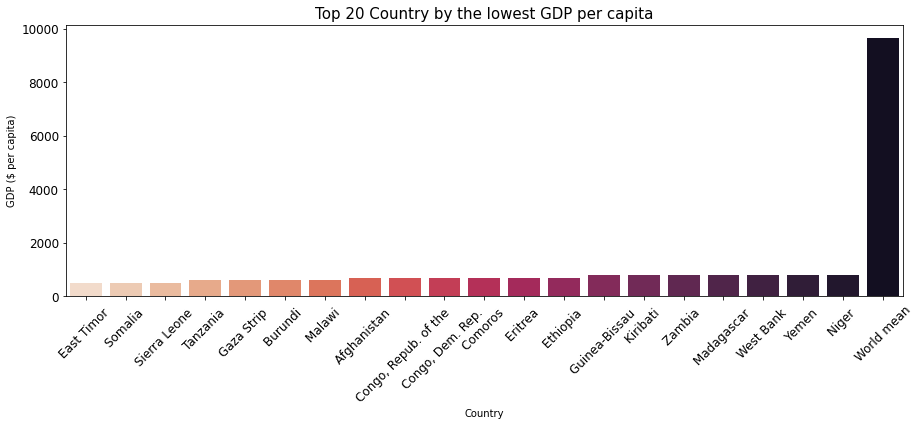

In [336]:
top20 = data.sort_values('GDP ($ per capita)',ascending=True,ignore_index=True).head(20)

mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})

top20_and_mean = pd.concat([top20[['Country','GDP ($ per capita)']],mean],ignore_index=True)

plt.figure(figsize=(15,5))
plt.title('Top 20 Country by the lowest GDP per capita', fontsize=15)
sns.barplot(x='Country', y='GDP ($ per capita)', data=top20_and_mean, palette='rocket_r')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

top20.groupby('Region').size().sort_values(ascending=False)

พล็อตกราฟแสดงสัดส่วนของประชากรในกลุ่มประเทศ 10 อันดับแรกที่มีประชากรมากที่สุด

([<matplotlib.patches.Wedge at 0x7fc691ea3520>,
 [Text(0.8870565606263926, 0.6504849408323571, 'China '),
  Text(-0.24233193235518, 1.0729749459148636, 'India '),
  Text(-0.8570544411481266, 0.6895343971900695, 'United States '),
  Text(-1.0063641196114264, 0.44410726042108245, 'Indonesia '),
  Text(-1.076555117804838, 0.22589616713926636, 'Brazil '),
  Text(-1.0992704226623007, 0.040056683085934144, 'Pakistan '),
  Text(-1.0928122673898104, -0.12554420831859098, 'Bangladesh '),
  Text(-1.0646645944480666, -0.2765669924787372, 'Russia '),
  Text(-1.0188754247469813, -0.41459964887425854, 'Nigeria '),
  Text(-0.9593031537038015, -0.5382726625920555, 'Japan '),
  Text(0.3107036111842737, -1.0552076885604331, 'Other')],
 [Text(0.48384903306894134, 0.3548099677267402, '20.1%'),
  Text(-0.13218105401191635, 0.5852590614081074, '16.8%'),
  Text(-0.4674842406262508, 0.37610967119458333, '4.6%'),
  Text(-0.5489258834244143, 0.24224032386604494, '3.8%'),
  Text(-0.5872118824390026, 0.1232160911

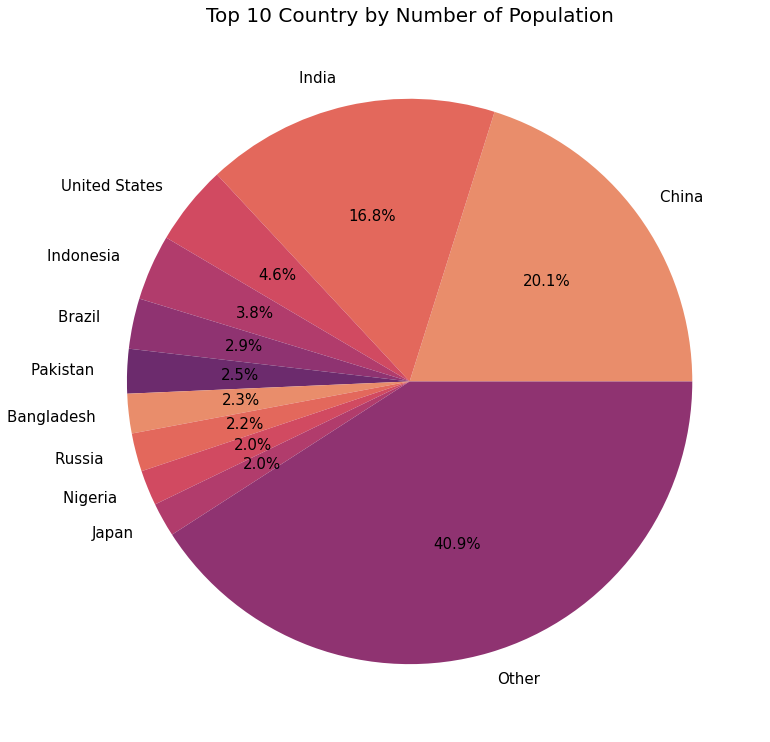

In [337]:
pop20 = data.sort_values('Population',ascending=False).head(10)

other = pd.DataFrame({'Country':['Other'], 'Population':[data['Population'].sum() - pop20['Population'].sum()]})
data_pop20 = pd.concat([pop20[['Country','Population']],other],ignore_index=True)

colors = sns.color_palette("flare").as_hex()
plt.figure(figsize=(13,13))
plt.title("Top 10 Country by Number of Population", fontsize=20)  
plt.pie(x='Population',data=data_pop20,labels='Country',autopct='%1.1f%%',startangle=0,colors=colors,textprops={'color':"black",'fontsize': 15})

พล็อตกราฟแสดง 20 อันดับประเทศที่มีประชากรสูงสุด

Text(0, 0.5, 'Population (Billion)')

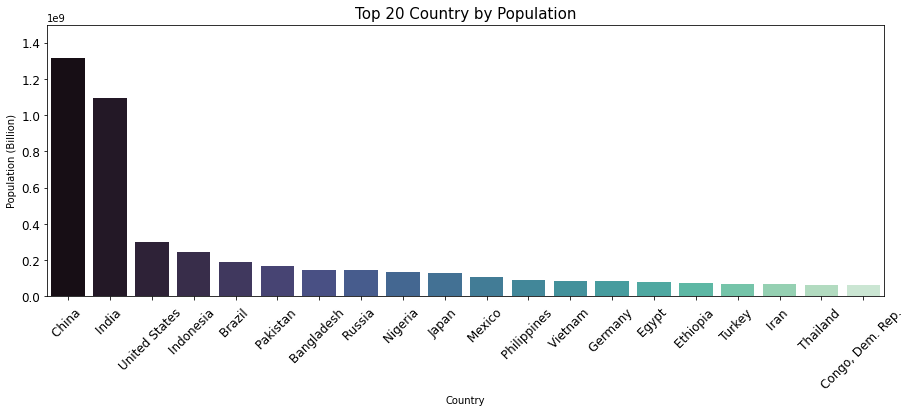

In [338]:
pop20 = data.sort_values('Population',ascending=False).head(20)

plt.figure(figsize=(15,5))
plt.title('Top 20 Country by Population',fontsize=15)
sns.barplot(x='Country',y='Population',data=pop20,palette='mako')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,1500000000)
plt.ylabel("Population (Billion)")          

ทำการหา Total GDP โดยนำ GDP per capita มาคูณกับจำนวนประชากร (Population) ของประเทศ

In [339]:
plt.figure(figsize=(10,10)) 

data['Total GDP ($)'] = data['GDP ($ per capita)'] * data['Population']

data10 = data.sort_values('Total GDP ($)',ascending=False).head(10)     
other = pd.DataFrame({'Country':['Other'], 'Total GDP ($)':[data['Total GDP ($)'].sum() - data10['Total GDP ($)'].sum()]})

data_and_totalGDP = pd.concat([data10[['Country','Total GDP ($)']],other],ignore_index=True)
data10.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Total GDP ($)
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,...,19.13,0.22,80.65,3.00,14.14,8.26,0.010,0.204,0.787,1.128119e+13
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,...,15.40,1.25,83.35,1.50,13.25,6.97,0.125,0.473,0.403,6.569869e+12
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,99.0,...,12.19,0.96,86.85,3.00,9.37,9.16,0.017,0.258,0.725,3.594474e+12
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,...,54.40,2.74,42.86,2.50,22.01,8.18,0.186,0.276,0.538,3.176521e+12
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,...,33.85,0.59,65.56,3.00,8.25,10.62,0.009,0.296,0.695,2.274855e+12
69,France,WESTERN EUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,99.0,...,33.53,2.07,64.40,4.00,11.99,9.14,0.022,0.214,0.764,1.680181e+12
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,...,23.46,0.21,76.33,3.00,10.71,10.13,0.005,0.237,0.758,1.678874e+12
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,...,27.79,9.53,62.68,3.00,8.72,10.40,0.021,0.291,0.688,1.552165e+12
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,...,6.96,0.90,92.15,2.00,16.56,6.17,0.084,0.400,0.516,1.429395e+12
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,...,7.33,0.11,92.56,2.75,9.95,14.65,0.054,0.371,0.575,1.271753e+12


<Figure size 720x720 with 0 Axes>

พล็อตกราฟแสดงสัดส่วนของประเทศที่มีผลิตภัณฑ์มวลรวมโดยรวม (Total GDP) สูงที่สุด

Text(0.5, 1.0, 'Top 10 Country by Percentage of Total GDP in the world')

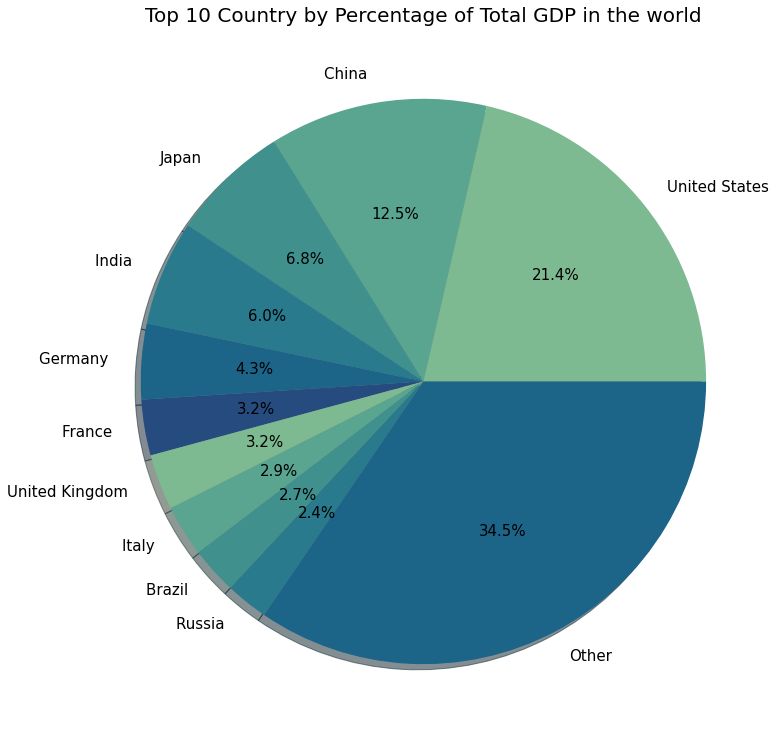

In [340]:
plt.figure(figsize=(13,13))  
colors = sns.color_palette("crest").as_hex()
plt.pie(data_and_totalGDP['Total GDP ($)'], labels=data_and_totalGDP['Country'],autopct='%1.1f%%',shadow=True,colors=colors,textprops={'color':"black",'fontsize': 15}) 
plt.title('Top 10 Country by Percentage of Total GDP in the world',fontsize=20)

พล็อตกราฟแสดง 20 อันดับประเทศที่มีผลิตภัณฑ์มวลรวมโดยรวม (Total GDP) สูงที่สุด

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

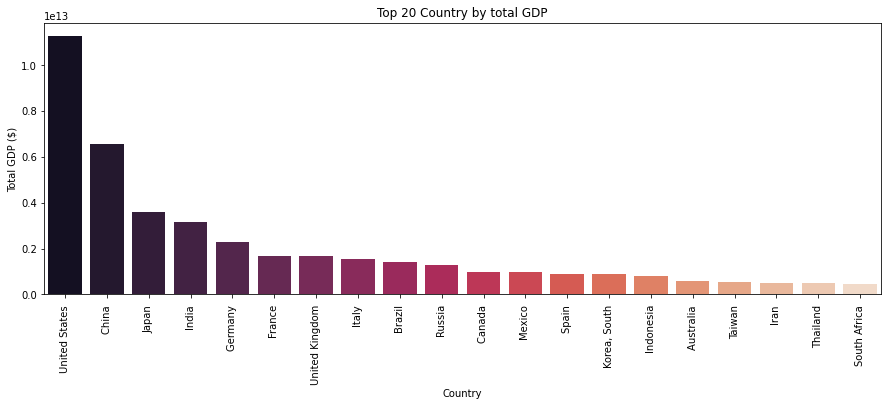

In [341]:
# 13) กราฟ barplot แสดง 20 อันดับประเทศที่มี Total GDP สูงที่สุด 

data20 = data.sort_values('Total GDP ($)',ascending=False).head(20) 

plt.figure(figsize=(15,5))
plt.title('Top 20 Country by total GDP')
sns.barplot(x='Country',y='Total GDP ($)',data=data20,palette='rocket')               
plt.xticks(rotation=90)                                                                   

พล็อตกราฟ Heatmap แสดงความสัมพันธ์ระหว่างตัวแปรทั้งหมด

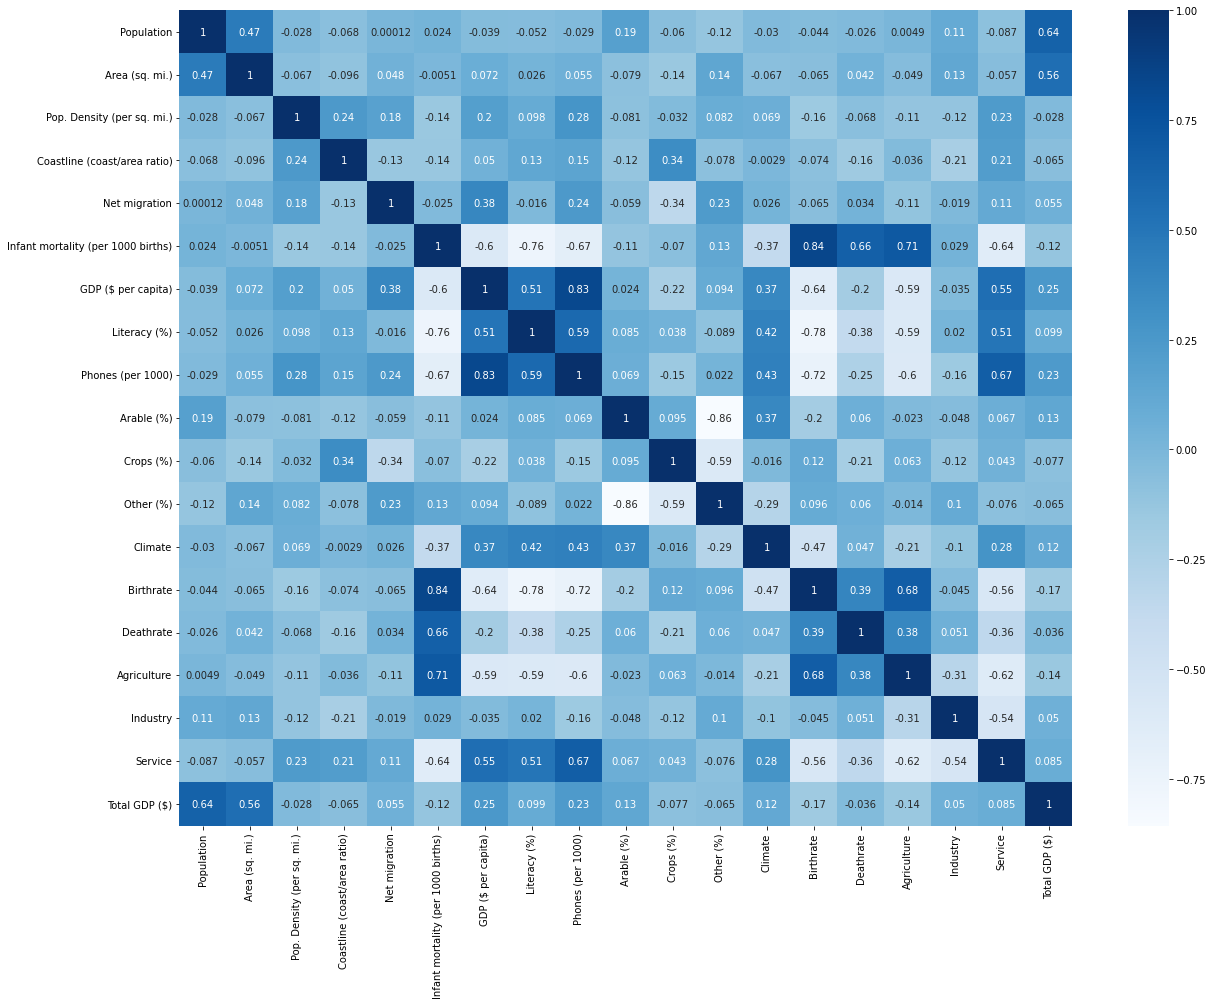

In [342]:
plt.figure(figsize=(20,15))
data_mx = data.corr()
sns.heatmap(data_mx,cmap='Blues',annot=True)

จะเห็นได้ว่า ตัวแปร (Features) ที่มีความสัมพันธ์ต่อผลิตภัณฑ์มวลรวมต่อหัวประชากร (GDP per captia) ค่อนข้างสูง ได้แก่
*   Literacy (%)
*   Phones (per 1000)
*   Net migration
*   Agriculture
*   Service
*   Pop. Density (per sq. mi.)
*   Birthrate
*   Deathrate
*   Infant mortality (per 1000 births)

ซึ่งเราจะนำตัวแปรทั้งหมดนี้ไปใช้ในการสร้างโมเดลในการทำนาย GDP per capita

พล็อตกราฟการกระจายตัวข้อมูล (scatter) แสดงความสัมพันธ์ระหว่างตัวแปรที่มีผลต่อผลิตภัณฑ์มวลรวมต่อหัวประชากร (GDP per capita) มากที่สุด

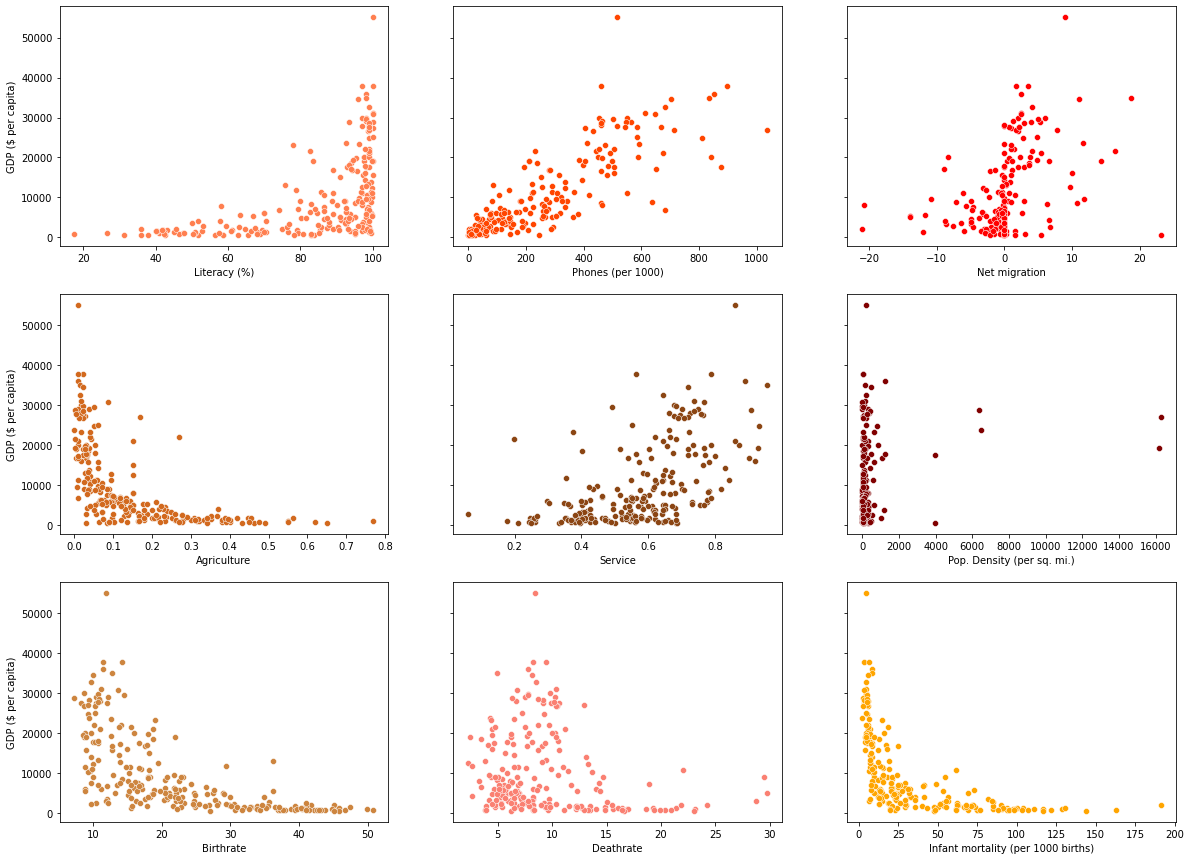

<Figure size 360x360 with 0 Axes>

In [343]:
fig , axes = plt.subplots(3,3,figsize=(20,15),sharey=True)

plt.figure(figsize=(5,5))
sns.scatterplot(ax=axes[0,0],x='Literacy (%)',y='GDP ($ per capita)',data=data,color='coral')                    
sns.scatterplot(ax=axes[0,1],x='Phones (per 1000)',y='GDP ($ per capita)',data=data,color='orangered')      
sns.scatterplot(ax=axes[0,2],x='Net migration',y='GDP ($ per capita)',data=data,color='red')        
sns.scatterplot(ax=axes[1,0],x='Agriculture',y='GDP ($ per capita)',data=data,color='chocolate')          
sns.scatterplot(ax=axes[1,1],x='Service',y='GDP ($ per capita)',data=data,color='saddlebrown')    
sns.scatterplot(ax=axes[1,2],x='Pop. Density (per sq. mi.)',y='GDP ($ per capita)',data=data,color='maroon')    
sns.scatterplot(ax=axes[2,0],x='Birthrate',y='GDP ($ per capita)',data=data,color='peru')          
sns.scatterplot(ax=axes[2,1],x='Deathrate',y='GDP ($ per capita)',data=data,color='salmon')    
sns.scatterplot(ax=axes[2,2],x='Infant mortality (per 1000 births)',y='GDP ($ per capita)',data=data,color='orange')    

## 4) GDP per capita Prediction by Machine Learning Models 

สร้างชุดข้อมูลสำหรับฝึกสอนและทดสอบ

In [344]:
# Features 
x = data[['Population','Pop. Density (per sq. mi.)','Net migration', 'Infant mortality (per 1000 births)','Literacy (%)',
          'Phones (per 1000)','Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate','Deathrate', 'Agriculture', 'Industry', 'Service']]
# Target
y = data['GDP ($ per capita)']

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

โมเดลที่เลือกใช้ในการศึกษาคือ Ensemble ได้แก้ Random Forest และ XGBoost

In [345]:
# Random Forest 
model1 = RandomForestRegressor(n_estimators=100)      
# XGBoost
model2 = XGBRegressor()

In [346]:
# fit model
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)       

[17:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [347]:
Y_train_predict_1 = model1.predict(X_train)      
Y_test_predict_1 = model1.predict(X_test)  
Y_train_predict_2 = model2.predict(X_train)      
Y_test_predict_2 = model2.predict(X_test)  

In [348]:
Y = np.append(Y_train,Y_test)                               
Y_predict_1 = np.append(Y_train_predict_1,Y_test_predict_1)
Y_predict_2 = np.append(Y_train_predict_2,Y_test_predict_2)

พล็อตกราฟเพื่อดูผลการทำนายด้วยโมเดล Random Forest โดยเปรียบเทียบระหว่างค่าจริง (TRUE) กับค่าที่ทำนาย (PREDICTED) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


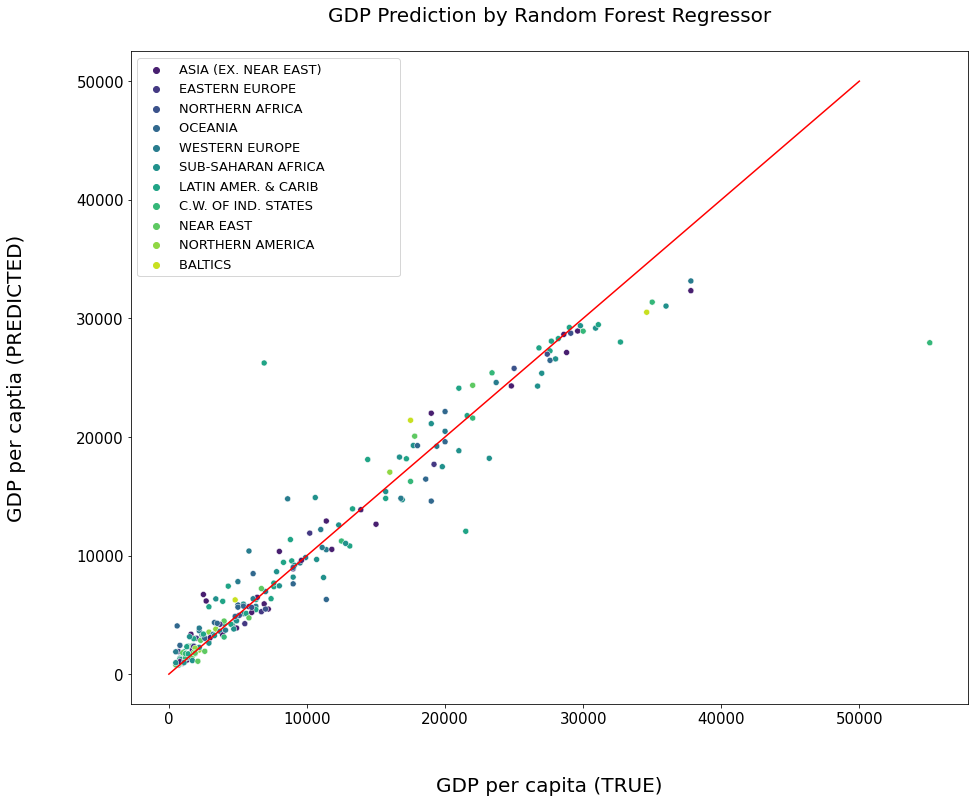

In [349]:
fig = plt.figure(figsize=(15,12))     
sns.scatterplot(Y,Y_predict_1,data=data,hue='Region',palette='viridis')    

plt.xlabel('GDP per capita (TRUE)',labelpad=50,fontsize=20) 
plt.ylabel('GDP per captia (PREDICTED)',labelpad=50,fontsize=20)            
plt.xticks(fontsize=15)         
plt.yticks(fontsize=15)  
plt.legend(prop={'size': 13})
plt.title('GDP Prediction by Random Forest Regressor',fontsize=20,pad=30)                    

x = np.linspace(0,50000,100)
plt.plot(x,x,c='red')
plt.show()                                                                    

In [350]:
print('R-squared score of Train data :','{:.4f}'.format(model1.score(X_train,Y_train)))     
print('R-squared score of Test data :','{:.4f}'.format(model1.score(X_test,Y_test))) 

R-squared score of Train data : 0.9751
R-squared score of Test data : 0.7064


In [351]:
print('MSE :','{:.2f}'.format(mean_squared_error(Y_test,Y_test_predict_1)))
print('RMSE :','{:.2f}'.format(np.sqrt(mean_squared_error(Y_test,Y_test_predict_1))))

MSE : 29669185.65
RMSE : 5446.94


พล็อตกราฟเพื่อดูผลการทำนายด้วยโมเดล XGBoost โดยเปรียบเทียบระหว่างค่าจริง (TRUE) กับค่าที่ทำนาย (PREDICTED) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


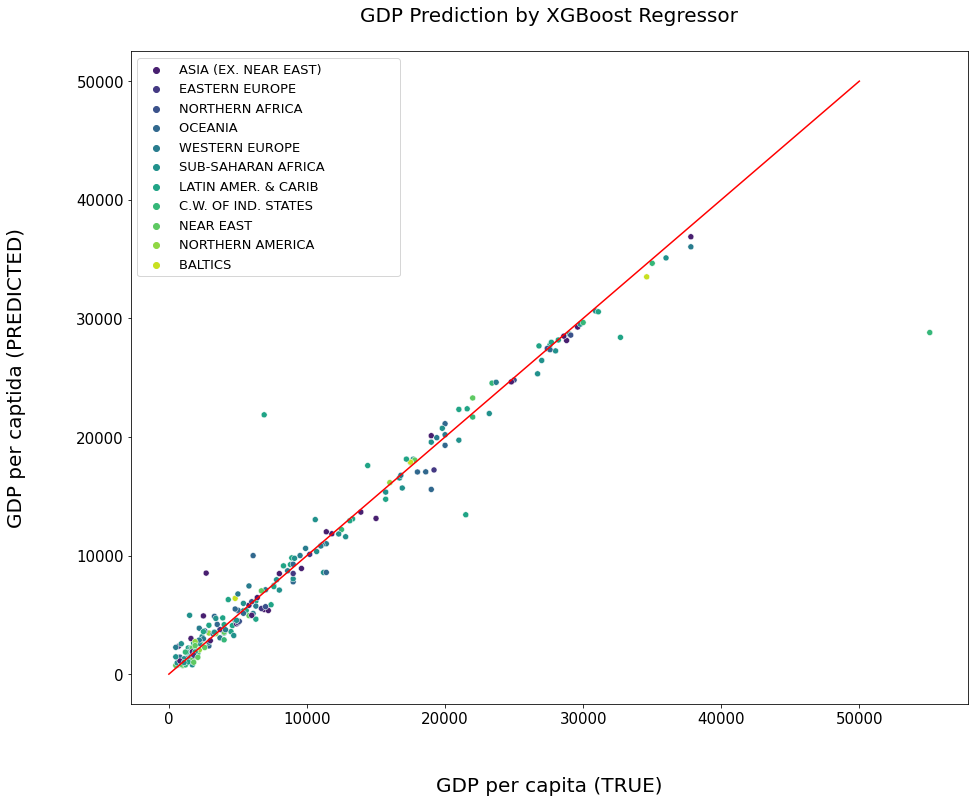

In [352]:
fig = plt.figure(figsize=(15,12))     
sns.scatterplot(Y,Y_predict_2,data=data,hue='Region',palette='viridis')    

plt.xlabel('GDP per capita (TRUE)',labelpad=50,fontsize=20) 
plt.ylabel('GDP per captida (PREDICTED)',labelpad=50,fontsize=20)         
plt.xticks(fontsize=15)         
plt.yticks(fontsize=15)  
plt.legend(prop={'size': 13})             
plt.title('GDP Prediction by XGBoost Regressor',fontsize=20,pad=30)                    

x = np.linspace(0,50000,100)
plt.plot(x,x,c='red')
plt.show()            

In [353]:
print('R-squared score of Train data :','{:.4f}'.format(model2.score(X_train,Y_train)))     
print('R-squared score of Test data :','{:.4f}'.format(model2.score(X_test,Y_test))) 

R-squared score of Train data : 0.9940
R-squared score of Test data : 0.7576


In [354]:
print('MSE :','{:.2f}'.format(mean_squared_error(Y_test,Y_test_predict_2)))
print('RMSE :','{:.2f}'.format(np.sqrt(mean_squared_error(Y_test,Y_test_predict_2))))

MSE : 24498313.65
RMSE : 4949.58
